# Homework 1

## Problem 1

In [1]:
import numpy as np
import pandas as pd

In [2]:
#setup initial DF
df = pd.DataFrame(columns = ['Index', #index 00
                   'Title', #*
                   'Authors', #@
                   'Year', #t
                   'Publication Venue', #c
                   'References', #%
                   'Abstract' #!
])

In [3]:
#loading AMiner data
file1 = open('C:/Users/chase/OneDrive/Northeastern Code/DS 5230/Hw 1/acm.txt', encoding="utf-8")
lines = file1.readlines()
file1.close

<function TextIOWrapper.close()>

In [4]:
#parsing function determines tag of each line and creates pandas dataframe of all publications
def parselines(lines, begin, end):
  index = ''
  title = ''
  authors = []
  year = ''
  pub = ''
  refs = []
  abstract = ''

  for line in lines[begin:end]:
    if line[:2] == '#i':
      index = line[6:len(line)-1]
    elif line[:2] == '#*':
      title = line[2:len(line)-1]
    elif line[:2] == '#@':
      line = (line[2:len(line)-1])
      authors = line.split(",")
    elif line[:2] == '#t':
      year = line[2:len(line)-1]
    elif line[:2] == '#c':
      pub = line[2:len(line)-1]
    elif line[:2] == '#%':
      line = (line[2:len(line)-1])
      refs.append(line)
    elif line[:2] == '#!':
      abstract = line[2:len(line)-1]
    else:
      print("line parsing error")

  new_row = {
      "Index": index, 
      "Title": title,
      "Authors": authors,
      "Year": year,
      "Publication Venue": pub,
      "References": refs,
      "Abstract": abstract
  }
  df_list.append(new_row)

In [5]:
#calls above function
start = 0
end = 0
df_list = []
for line in lines:
  if line == '\n':
#    print(f"start: {start}, end: {end}, lines: {lines[start:end]}")
    parselines(lines, start, end)
    start = end+1
  end += 1

In [6]:
#data cleanup
df = pd.DataFrame(df_list)
df.References = df.References.apply(lambda y: np.nan if len(y)==0 else y)
df.Index = df.Index.astype(int)

### A
Compute the number of distinct authors, publication venues, publications, and citations/references

In [7]:
print(f"Unique Authors: {df['Authors'].explode().nunique()}")
print(f"Unique Publication Venue: {df['Publication Venue'].nunique()}")
print(f"Unique References: {df['References'].explode().count()}")
print(f"Unique Publications: {df['Title'].nunique()}")

Unique Authors: 2027029
Unique Publication Venue: 273330
Unique References: 9671893
Unique Publications: 2183552


### B
Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases” – what do you notice?

In [8]:
df.loc[df['Publication Venue'].str.contains("Principles and Practice of Knowledge Discovery in Databases")]

,Index,Title,Authors,Year,Publication Venue,References,Abstract
799595,799596,Summarization of dynamic content in web collec...,"[Adam Jatowt, Mitsuru Ishizuka]",2004,PKDD '04 Proceedings of the 8th European Confe...,"[168250, 207271, 217577, 272248, 287615, 35790...",This paper describes a new research proposal o...
799732,799733,Proceedings of the 8th European Conference on ...,"[Jean-François Boulicaut, Floriana Esposito, ...",2004,PKDD '04 Proceedings of the 8th European Confe...,NaN,
799733,799734,Random matrices in data analysis,[Dimitris Achlioptas],2004,PKDD '04 Proceedings of the 8th European Confe...,NaN,We show how carefully crafted random matrices ...
799734,799735,Data privacy,[Rakesh Agrawal],2004,PKDD '04 Proceedings of the 8th European Confe...,NaN,There is increasing need to build information ...
799735,799736,Breaking through the syntax barrier: searching...,[Soumen Chakrabarti],2004,PKDD '04 Proceedings of the 8th European Confe...,NaN,The next wave in search technology will be dri...
...,...,...,...,...,...,...,...
1673617,1673618,Speeding up logistic model tree induction,"[Marc Sumner, Eibe Frank, Mark Hall]",2005,PKDD'05 Proceedings of the 9th European confer...,"[136349, 290481, 810934, 2135000]",Logistic Model Trees have been shown to be ver...
1673618,1673619,A random method for quantifying changing distr...,"[Haixun Wang, Jian Pei]",2005,PKDD'05 Proceedings of the 9th European confer...,"[115607, 342599, 400846, 424996, 443615, 48145...",In applications such as fraud and intrusion de...
1673619,1673620,Deriving class association rules based on leve...,"[Takashi Washio, Koutarou Nakanishi, Hiroshi...",2005,PKDD'05 Proceedings of the 9th European confer...,"[210159, 248791, 397383, 466482, 481289, 54604...",Most approaches of Class Association Rule (CAR...
1673620,1673621,An incremental algorithm for mining generators...,"[Lijun Xu, Kanglin Xie]",2005,PKDD'05 Proceedings of the 9th European confer...,"[280466, 464203, 466663, 481289, 511332, 54669...",This paper presents an efficient algorithm for...


We notice many "distinct" values of publication venue appear to be from different years of the same conference, or the same year but with different names, which may not be accurate for our purposes.

### C
For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)

In [9]:
import matplotlib.pyplot as plt

In [10]:
#create series of Authors and counts of publications
test = pd.Series([x for item in df.Authors for x in item]).value_counts()

<AxesSubplot: title={'center': 'Histogram of Publications per Author'}, xlabel='Authors', ylabel='Publications'>

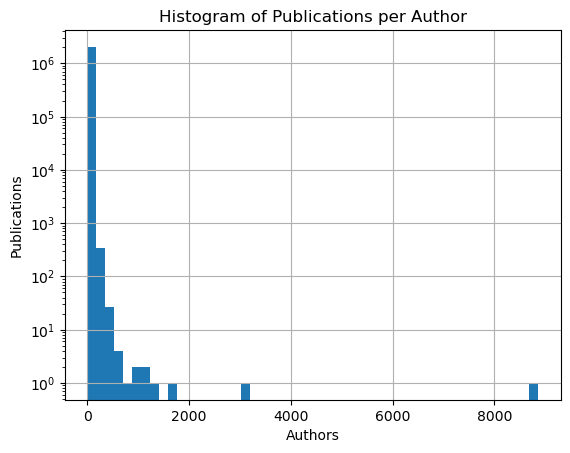

In [11]:
plt.xlabel('Authors')
plt.ylabel('Publications')
plt.title('Histogram of Publications per Author')
plt.grid(True)
test.hist(bins = 50, log = True)

### D
Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.

In [12]:
#expanding authors lists
df2 = df.explode('Authors')

In [13]:
#removing blank values
df2 = df2[(df2['Authors'] != '') & (df2['Authors'].str.contains('-') == False) & (~df2['Authors'].isnull()) ]

In [14]:
#expanding references lists
df2 = df2.explode('References')

In [15]:
print(f"Mean Publications per Author: {test.mean()}")
print(f"Standard Deviation of Publications per Authors: {test.std()}")
print(f"First Quartile Publications per Author: {test.quantile(.25)}")
print(f"Median Publications per Author: {test.median()}")
print(f"Third Quartile Publications per Author: {test.quantile(.75)}")

Mean Publications per Author: 2.821294120607056
Standard Deviation of Publications per Authors: 9.934478980495243
First Quartile Publications per Author: 1.0
Median Publications per Author: 1.0
Third Quartile Publications per Author: 2.0


From the first and second quartiles of 1, we can infer that most of the authors in the dataset have only a single publication, with the next quartile of 2 showing that most authors in this dataset don't have large numbers of publications. This supports the slighly higher mean, which is likely higher due to the small number of authors with very high numbers of publications.

### E
Now plot a histogram of the number of publications per venue, as well as calculate the mean, standard deviation, median, Q1, and Q3 values. What is the venue with the largest number of publications in the dataset?

In [16]:
#creating series of venues and counts
pubs = pd.Series(df['Publication Venue']).value_counts()

<AxesSubplot: title={'center': 'Histogram of Publications per Venue'}, xlabel='Venues', ylabel='Publications'>

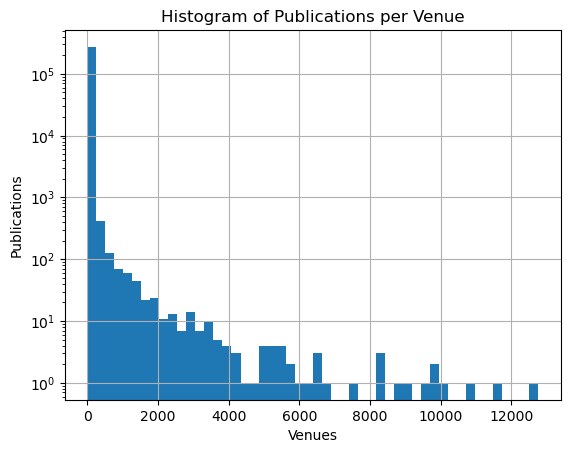

In [48]:
plt.xlabel('Venues')
plt.ylabel('Publications')
plt.title('Histogram of Publications per Venue')
plt.grid(True)
pubs.hist(bins = 50, log = True)

In [18]:
print(f"Mean Publications per Venue: {pubs.mean()}")
print(f"Standard Deviation of Publications per Venue: {pubs.std()}")
print(f"First Quartile Publications per Venue: {pubs.quantile(.25)}")
print(f"Median Publications per Venue: {pubs.median()}")
print(f"Third Quartile Publications per Venue: {pubs.quantile(.75)}")

Mean Publications per Venue: 8.725957633629678
Standard Deviation of Publications per Venue: 106.79612093241556
First Quartile Publications per Venue: 1.0
Median Publications per Venue: 1.0
Third Quartile Publications per Venue: 1.0


We can above see that the venue with the largest number of publications is the IEEE Transactions on Information Theory venue.

### F
Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. What is the publication with the largest number of references? What is the publication with the largest number of citations? Do these make sense?

In [19]:
#expand references lists and group by index, then count references
refs = df.explode(['References']).groupby(['Index']).count()

In [20]:
refs['References'].sort_values()

Index
1            0
1322906      0
1322905      0
1322904      0
1322903      0
          ... 
1376719    525
1583652    528
1221203    556
719352     773
2015217    809
Name: References, Length: 2385057, dtype: int64

<AxesSubplot: title={'center': 'Histogram of References'}>

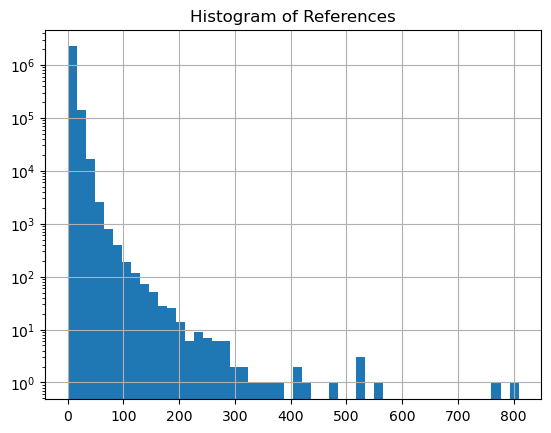

In [21]:
plt.title('Histogram of References')
plt.grid(True)
refs['References'].hist(bins = 50, log = True)

In [22]:
#expand references lists
cites = df.explode('References')

In [23]:
cites.References = cites.References.astype('Int64')

In [24]:
#calculate citations per publication
cites = cites.groupby(['References']).size()

In [25]:
cites.sort_values()

References
2383389         1
1306819         1
514141          1
1306829         1
1306830         1
            ...  
190580       5297
369235       6526
408395       8620
2381731     82080
2135000    938039
Length: 1007495, dtype: int64

<AxesSubplot: title={'center': 'Histogram of Citations'}>

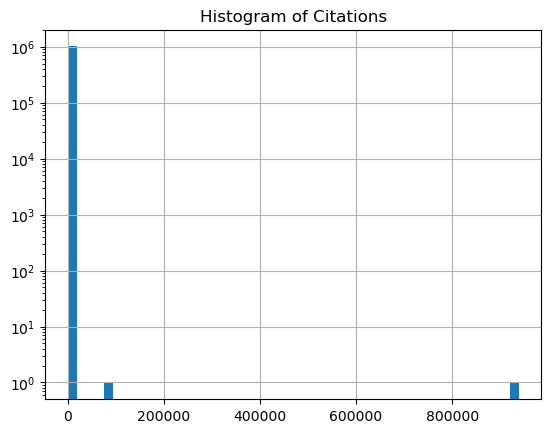

In [26]:
plt.title('Histogram of Citations')
plt.grid(True)
cites.hist(bins = 50, log = True)

The Publication with the largest number of references is Index 2015217 with 809 references.
<br>
The Publication with the largest number of citations (publications referring to it) is publication Index 2135000 with 938039 citations.

### G
Calculate the so called “impact” factor for each venue. To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. Plot a histogram of the results

In [49]:
#Create df of publications, Indices, and counts to join citations data to
pubJoin = pd.DataFrame(df.groupby(['Publication Venue', 'Index'], dropna = True).size().sort_values().reset_index(name = 'count').replace('', np.nan).dropna()).sort_values('Publication Venue')

In [52]:
#join citation counts
pubJoin = pubJoin.join(pd.DataFrame(cites)).sort_values('count').dropna()

In [54]:
pubJoin = pubJoin.rename(columns={0: "total"})

In [56]:
#calculate sum of citations for publications in venue
sums = pd.DataFrame(pubJoin[['Publication Venue', 'total']].groupby('Publication Venue').sum().sort_values('total'))

In [57]:
#calculate counts of citations for publications in venue
counts = pd.DataFrame(pubJoin[['Publication Venue', 'total']].groupby('Publication Venue').count()).sort_values('total')

In [60]:
#combine sums and counts by venue
final = pd.merge(sums, counts, on = ['Publication Venue'])

In [62]:
#calculate impact
final['Impact'] = final['total_x'] / final['total_y']

In [64]:
#sort
final = final.sort_values(['Impact'])

<AxesSubplot: title={'center': 'Histogram of Venue Impacts'}>

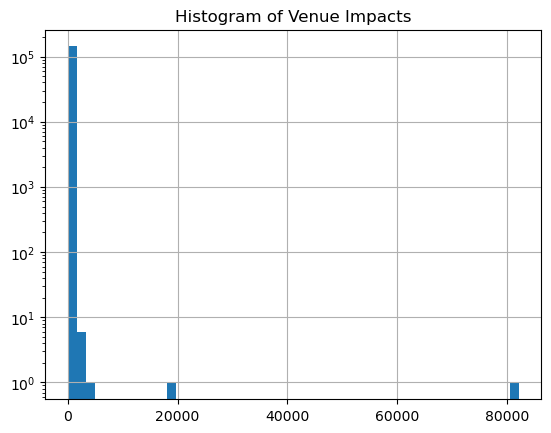

In [35]:
plt.title('Histogram of Venue Impacts')
plt.grid(True)
final['Impact'].hist(bins = 50, log = True)

In [65]:
final

,total_x,total_y,Impact
Publication Venue,,,
!%@:: a directory of electronic mail addressing and networks: second edition,1.0,1,1.000000
UIST 88 Symposium on User Interface Software,1.0,1,1.000000
"Advances in Web-Age Information Management: 5th International Conference, WAIM 2004, Dalian, China, July 15-17, 2004, Proceedings (Lecture Notes in Computer Science)",1.0,1,1.000000
UDS: A UNIVERSAL DATA STRUCTURE,1.0,1,1.000000
"Advances in Wireless Networks: Performance Modelling, Analysis and Enhancement",1.0,1,1.000000
...,...,...,...
"Personal Computers for the Computer Illiterate: The What when why Where and how Guide to Understanding, Buying and Using",2111.0,1,2111.000000
Safe Sites Internet Yellow Pages,2388.0,1,2388.000000
MCTS Self-Paced Training Kit (Exam 70-511): Windows Application Development with Microsoft .NET Framework 4,3452.0,1,3452.000000


### H
What is the venue with the highest apparent impact factor? Do you believe this number?(http://mdanderson.libanswers.com/faq/26159)

HICS '96 Proceedings of the 3rd Symposium on Human Interaction with Complex Systems (HICS '96)	has the most impacts at 82080
<br>
This does not seem very reasonable, and is likely due to the single publication we have for this venue.

### I
Now repeat the calculation from item b., but restrict the calculation to venues with at least 10 publications. How does your histogram change? List the citation counts for all publications from the venue with the highest impact factor. How does the impact factor (mean number of citations) compare to the median number of citations?

In [37]:
final10 = final[final['total_y'] >= 10]

In [38]:
final10 = final10.drop('Finite Fields and Their Applications')

<AxesSubplot: title={'center': 'Histogram of Venue Impacts'}>

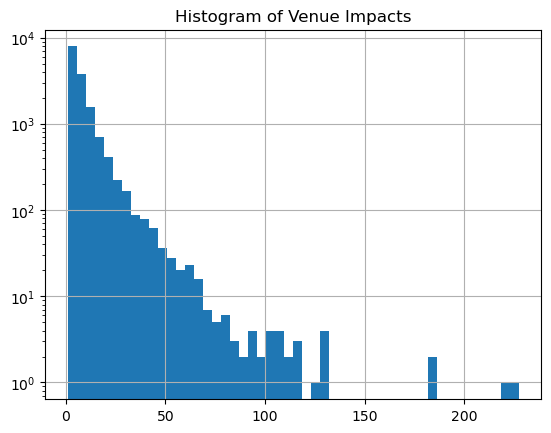

In [39]:
plt.title('Histogram of Venue Impacts')
plt.grid(True)
final10['Impact'].hist(bins = 50, log = True)

Now our histogram seems much more reasonable after removing venues with publications < 10, and a single outlier we were seeing.

In [40]:
final10.sort_values(by = 'Impact', ascending = False).head(10).rename(columns={'total_x': 'Citations', 'total_y': 'Publications'})

,Citations,Publications,Impact
Publication Venue,,,
LICS '97 Proceedings of the 12th Annual IEEE Symposium on Logic in Computer Science,6134.0,27,227.185185
SOCA '13 Proceedings of the 2013 IEEE 6th International Conference on Service-Oriented Computing and Applications,6444.0,29,222.206897
WRAC'05 Proceedings of the Second international conference on Radical Agent Concepts: innovative Concepts for Autonomic and Agent-Based Systems,2778.0,15,185.200000
NordSec '09 Proceedings of the 14th Nordic Conference on Secure IT Systems: Identity and Privacy in the Internet Age,2777.0,15,185.133333
Modern software tools for scientific computing,1312.0,10,131.200000
MobiCom '97 Proceedings of the 3rd annual ACM/IEEE international conference on Mobile computing and networking,3396.0,26,130.615385
MSN '12 Proceedings of the 2012 8th International Conference on Mobile Ad-hoc and Sensor Networks,1811.0,14,129.357143
SWAT '08 Proceedings of the 11th Scandinavian workshop on Algorithm Theory,4396.0,34,129.294118
ISM '08 Proceedings of the 2008 Tenth IEEE International Symposium on Multimedia,4717.0,38,124.131579


In [41]:
print(f"Mean: {final10['Impact'].mean()}")
print(f"Median: {final10['Impact'].median()}")

Mean: 8.215642801586187
Median: 5.267261904761905


We can see a higher mean at 8.2 compared to our Median of 5.3, which indicates a right skew of our Impact data.

### J 
 Finally, construct a list of publications for each publication year. Use this list to plot the average number of references and average number of citations per publication as a function of time. Explain the differences you see in the trends.

In [66]:
#initialize DF
yearly = df[['Index', 'Title', 'Year']]

In [67]:
#join citation data
temp = pd.merge(yearly, pd.DataFrame(cites), left_on = 'Index', right_on = 'References')

In [68]:
#join reference data
temp = pd.merge(temp, pd.DataFrame(refs['References']), on = 'Index')

In [77]:
yearly = temp.rename(columns = {0:'Citations'})

In [96]:
#get data means
yearly = yearly.groupby('Year')[['Citations', 'References']].mean().sort_values('Year')

<AxesSubplot: xlabel='Year'>

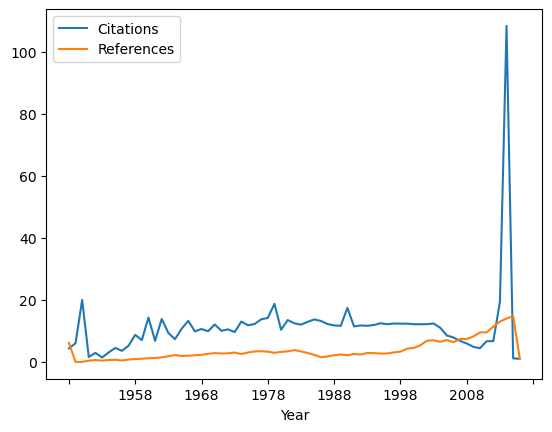

In [71]:
yearly.plot()

We can see an overall slightly upward trend in both average Citations and References over time, though References begins to increase more sharply in the 2000s.